In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# ==========================================
# 1. DATA INPUT (7 Data Latih dari User)
# ==========================================
# Kita ambil seluruh 6 fitur, tapi untuk visualisasi kita pakai col 0 dan 1 (PC1, PC2)
data_train = np.array([
    [1.5927, 0.1939, -0.2658, 0.0432, -0.7748, -0.4548],
    [1.2941, -0.6202, 0.1870, 0.4601, 0.4316, 0.9033],
    [-0.8108, 1.7007, 0.4825, -0.3017, -0.7114, 0.4377],
    [-1.1346, 0.5654, -0.1537, -0.1955, -0.1762, -0.2578],
    [0.5446, 0.6216, 0.2640, -0.1815, 0.3008, -0.7426],
    [-1.1552, 0.8254, 0.5125, 0.5669, 0.3027, 0.8594],
    [0.1210, -0.5263, 0.4124, 0.2815, -0.2384, -0.8493]
])

labels = [3, 6, 1, 5, 4, 5, 2]
points_2d = data_train[:, :2] # Mengambil PC1 dan PC2 untuk visualisasi

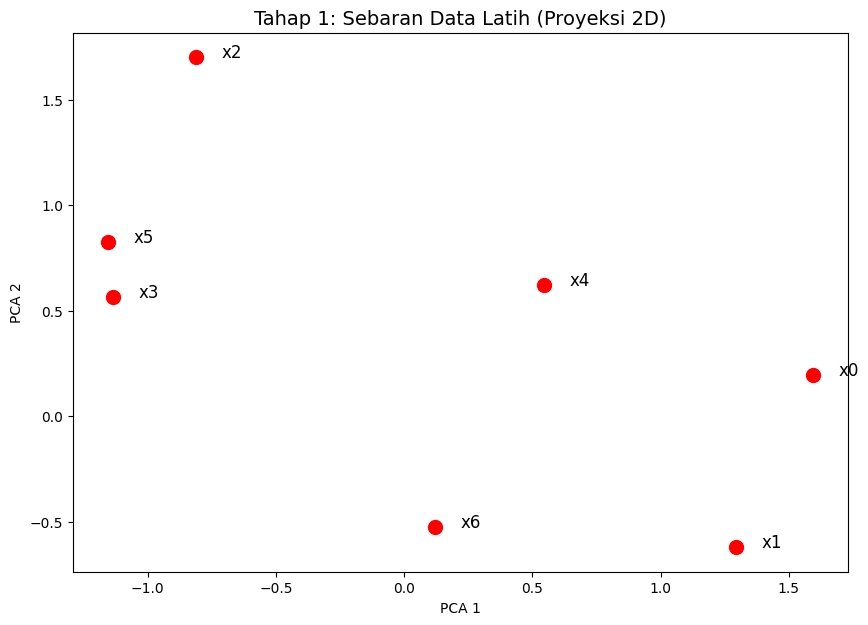

In [3]:
# ==========================================
# TAHAP 1: Scatter Plot (Posisi Awal)
# ==========================================
plt.figure(figsize=(10, 7))
plt.scatter(points_2d[:, 0], points_2d[:, 1], c='red', s=100, zorder=5)
for i, txt in enumerate(range(7)):
    plt.annotate(f"x{i}", (points_2d[i, 0]+0.1, points_2d[i, 1]), fontsize=12)
plt.title("Tahap 1: Sebaran Data Latih (Proyeksi 2D)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
# plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

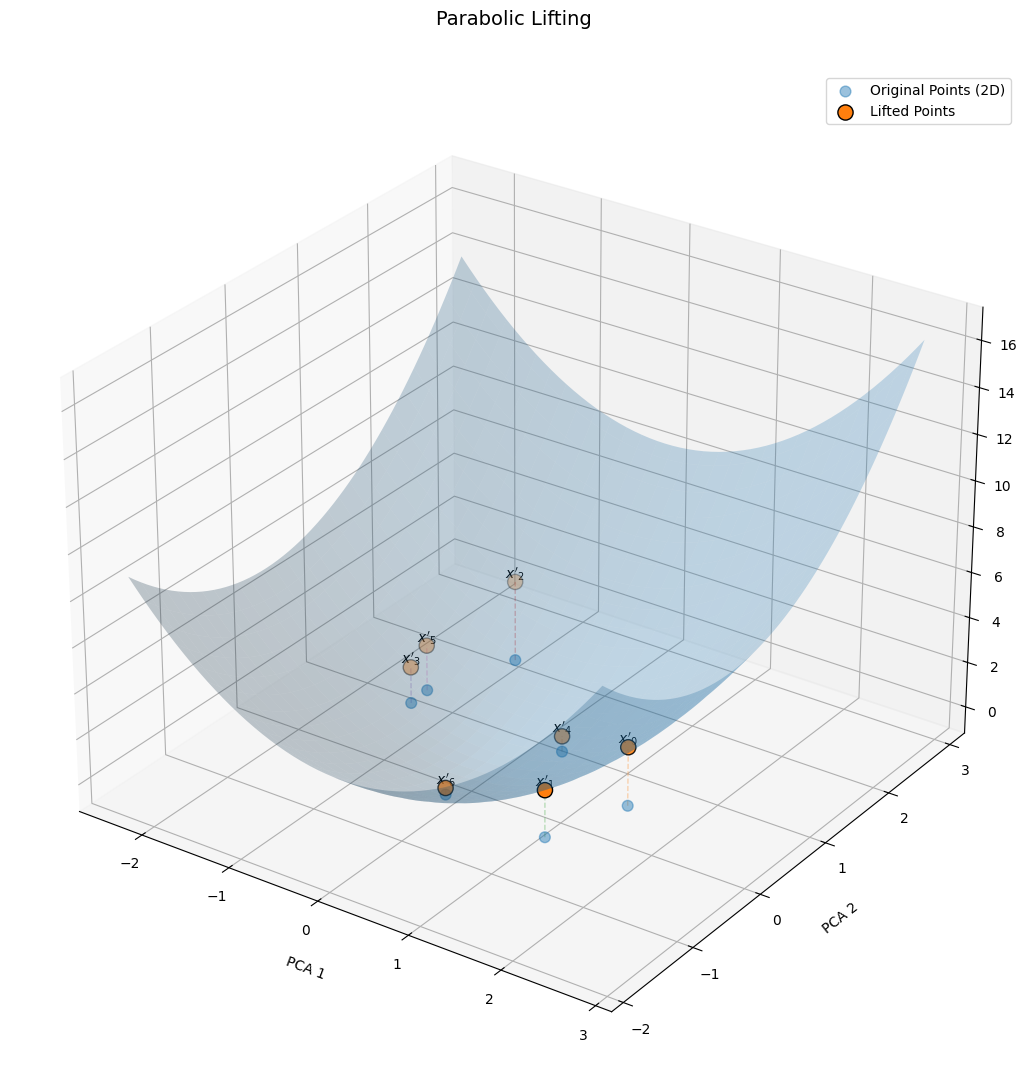

In [8]:
# ==========================================
# TAHAP 2: Parabolic Lifting (Enhanced 3D Visualization)
# ==========================================
fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111, projection='3d')

# Data points
x = points_2d[:, 0]
y = points_2d[:, 1]
z = x**2 + y**2

# Surface paraboloid (lebih halus & informatif)
x_mesh = np.linspace(min(x)-1.2, max(x)+1.2, 60)
y_mesh = np.linspace(min(y)-1.2, max(y)+1.2, 60)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z = X**2 + Y**2

ax.plot_surface(
    X, Y, Z,
    alpha=0.25,
    linewidth=0,
    antialiased=True
)

# Original 2D points (di bidang z=0)
ax.scatter(
    x, y, np.zeros_like(z),
    s=60,
    alpha=0.45,
    label="Original Points (2D)"
)

# Lifted points
ax.scatter(
    x, y, z,
    s=120,
    edgecolor='k',
    depthshade=True,
    label="Lifted Points"
)

# Garis proyeksi (lebih subtle)
for i in range(len(x)):
    ax.plot(
        [x[i], x[i]],
        [y[i], y[i]],
        [0, z[i]],
        linestyle='--',
        linewidth=1,
        alpha=0.3
    )
    ax.text(
        x[i], y[i], z[i] + 0.2,
        f"$x'_{{{i}}}$",
        fontsize=10,
        ha='center'
    )

# Label & judul
ax.set_title(
    "Parabolic Lifting\n",
    fontsize=14,
    pad=18
)

ax.set_xlabel("PCA 1", labelpad=10)
ax.set_ylabel("PCA 2", labelpad=10)
ax.set_zlabel(r"Height ($z = x^2 + y^2$)", labelpad=10)

# View angle yang informatif
ax.view_init(elev=28, azim=-55)

# Grid lebih halus
ax.grid(True, linestyle=':', alpha=0.4)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

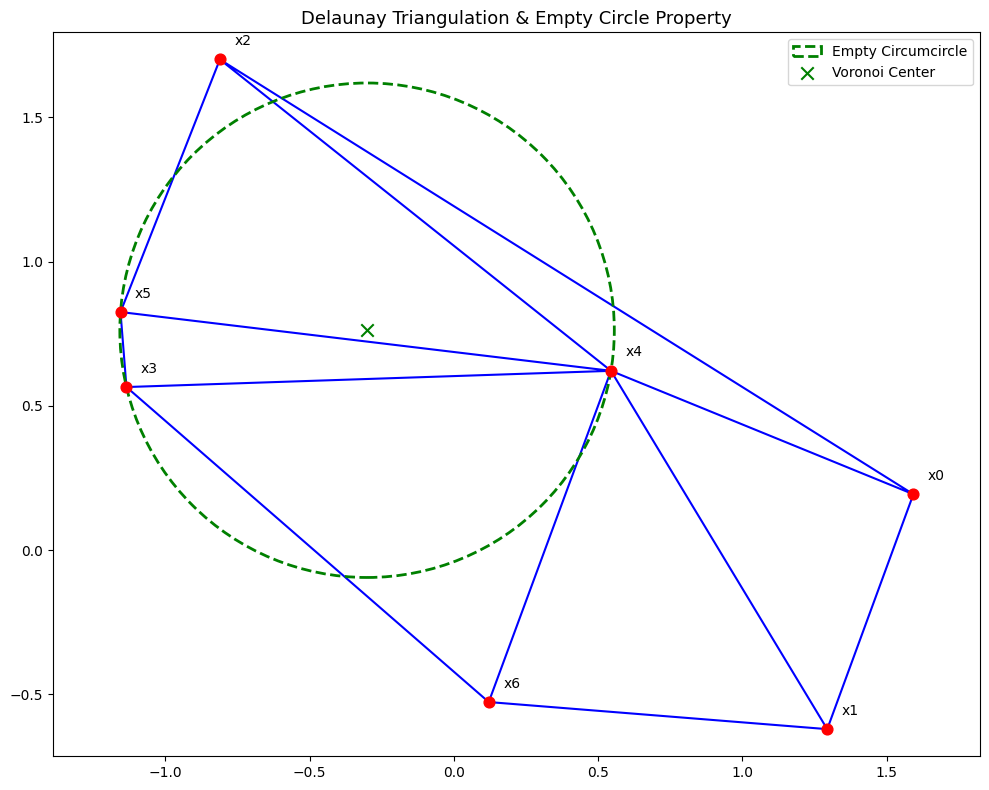

In [5]:
# ======================================================
# TAHAP 3 & 4
# Delaunay Triangulation & Empty Circle Property
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


# ------------------------------------------------------
# Helper Function: Circumcenter of a Triangle
# ------------------------------------------------------
def compute_circumcenter(a, b, c):
    """
    Menghitung circumcenter segitiga dari tiga titik 2D
    """
    d = 2 * (
        a[0] * (b[1] - c[1]) +
        b[0] * (c[1] - a[1]) +
        c[0] * (a[1] - b[1])
    )

    ux = (
        (a[0]**2 + a[1]**2) * (b[1] - c[1]) +
        (b[0]**2 + b[1]**2) * (c[1] - a[1]) +
        (c[0]**2 + c[1]**2) * (a[1] - b[1])
    ) / d

    uy = (
        (a[0]**2 + a[1]**2) * (c[0] - b[0]) +
        (b[0]**2 + b[1]**2) * (a[0] - c[0]) +
        (c[0]**2 + c[1]**2) * (b[0] - a[0])
    ) / d

    return np.array([ux, uy])


# ------------------------------------------------------
# Delaunay Triangulation
# ------------------------------------------------------
tri = Delaunay(points_2d)


# ------------------------------------------------------
# Visualization Setup
# ------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.title("Delaunay Triangulation & Empty Circle Property", fontsize=13)

# Plot points
plt.scatter(
    points_2d[:, 0],
    points_2d[:, 1],
    color="red",
    s=60,
    zorder=3
)

# Plot Delaunay edges
plt.triplot(
    points_2d[:, 0],
    points_2d[:, 1],
    tri.simplices,
    color="blue",
    linewidth=1.5,
    zorder=1
)


# ------------------------------------------------------
# Empty Circumcircle Visualization (One Triangle Example)
# ------------------------------------------------------
simplex = tri.simplices[0]
triangle_pts = points_2d[simplex]

circumcenter = compute_circumcenter(
    triangle_pts[0],
    triangle_pts[1],
    triangle_pts[2]
)

radius = np.linalg.norm(triangle_pts[0] - circumcenter)

# Draw circumcircle
circumcircle = plt.Circle(
    circumcenter,
    radius,
    fill=False,
    linestyle="--",
    linewidth=2,
    color="green",
    label="Empty Circumcircle"
)
plt.gca().add_patch(circumcircle)

# Draw circumcenter (Voronoi vertex)
plt.scatter(
    circumcenter[0],
    circumcenter[1],
    marker="x",
    color="green",
    s=80,
    label="Voronoi Center",
    zorder=4
)


# ------------------------------------------------------
# Point Annotations
# ------------------------------------------------------
for i, (x, y) in enumerate(points_2d):
    plt.text(
        x + 0.05,
        y + 0.05,
        f"x{i}",
        fontsize=10
    )


# ------------------------------------------------------
# Final Touches
# ------------------------------------------------------
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()


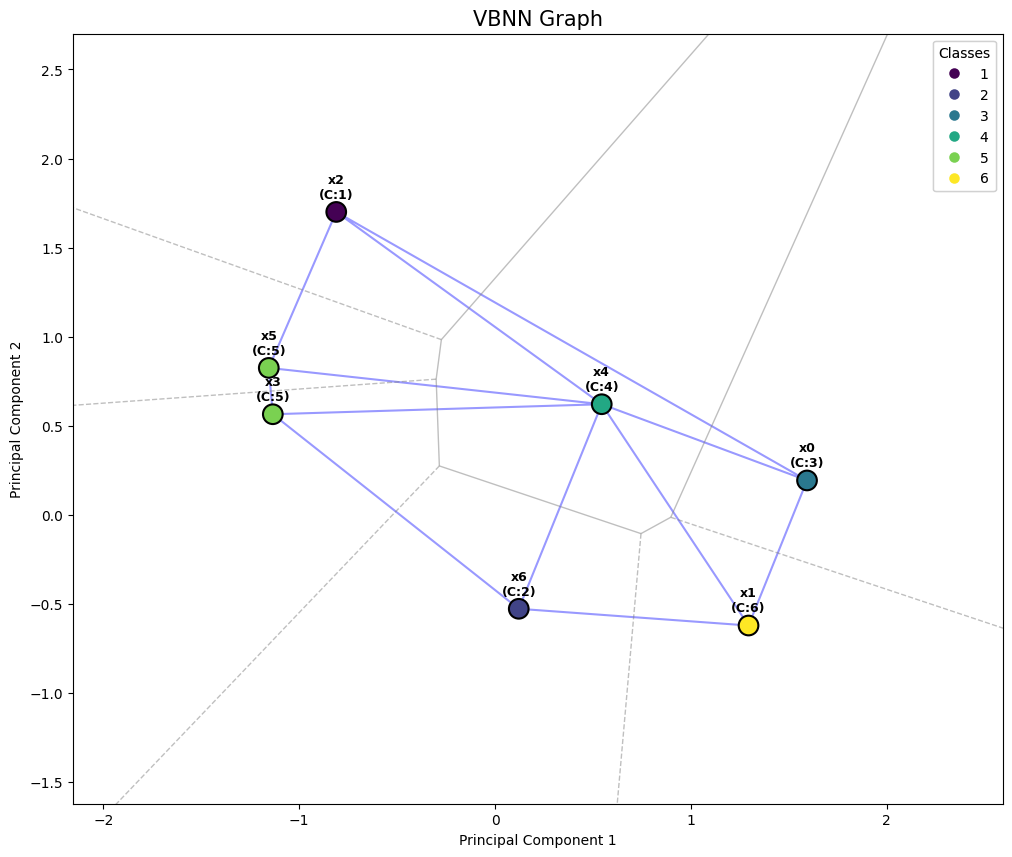

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

# ==========================================
# DATA INPUT (7 Data Latih)
# ==========================================
# Mengambil kolom 0 dan 1 (PC1 & PC2) untuk visualisasi 2D
data_train = np.array([
    [1.5927, 0.1939],   # P0
    [1.2941, -0.6202],  # P1
    [-0.8108, 1.7007],  # P2
    [-1.1346, 0.5654],  # P3
    [0.5446, 0.6216],   # P4
    [-1.1552, 0.8254],  # P5
    [0.1210, -0.5263]   # P6
])

# Label sesuai data Anda
labels = [3, 6, 1, 5, 4, 5, 2]

# ==========================================
# PERHITUNGAN GEOMETRI
# ==========================================
# 1. Hitung Delaunay (untuk garis koneksi graph)
tri = Delaunay(data_train)

# 2. Hitung Voronoi (untuk background wilayah)
vor = Voronoi(data_train)

# ==========================================
# VISUALISASI TAHAP 5 (Graph + Voronoi)
# ==========================================
fig, ax = plt.subplots(figsize=(12, 10))

# --- LAYER 1: VORONOI (Background) ---
# Menggunakan fungsi bawaan scipy untuk plot Voronoi
# show_vertices=False agar titik pertemuan garis voronoi tidak digambar (biar bersih)
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray',
                line_width=1, line_alpha=0.5, point_size=0)

# --- LAYER 2: DELAUNAY (Graph Connections) ---
# Menggambar garis segitiga yang menghubungkan titik data
ax.triplot(data_train[:, 0], data_train[:, 1], tri.simplices,
           color='blue', alpha=0.4, linewidth=1.5, label='Delaunay Graph (VBNN Structure)')

# --- LAYER 3: DATA POINTS (Nodes) ---
# Scatter plot dengan warna berbeda berdasarkan Label Kelas
scatter = ax.scatter(data_train[:, 0], data_train[:, 1], c=labels, cmap='viridis',
                     s=200, edgecolors='black', linewidth=1.5, zorder=10, label='Data Points')

# --- ANOTASI & FORMATTING ---
# Menambahkan label P0 - P6
for i, txt in enumerate(range(len(data_train))):
    ax.annotate(f"x{i}\n(C:{labels[i]})", 
                (data_train[i, 0], data_train[i, 1]),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold')

# Membuat Legend untuk Warna Kelas
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.title("VBNN Graph", fontsize=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Mengatur batas plot agar garis Voronoi yang 'infinite' terlihat rapi
# Kita beri sedikit padding dari data terluar
plt.xlim(data_train[:,0].min() - 1, data_train[:,0].max() + 1)
plt.ylim(data_train[:,1].min() - 1, data_train[:,1].max() + 1)

plt.show()